Name : Abyan Naufal

The main objective of this project is to:

    Build a machine learning model that can predict whether an employee is likely to leave (Attrition = Yes)

    Focus on high recall for the minority class (employees who leave), while still maintaining balanced performance using F1-score

    Provide actionable business insights for the HR department based on the most influential features that drive attrition

Model Deployment : https://huggingface.co/spaces/Abyanfl/ModelDeployment

# Import Libraries


In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [363]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [364]:
pd.set_option('display.max_columns', None)

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

``` 
There are 1,470 rows and 35 columns in the data.
There are 0 missing values in the data.
```



### Summary Statistik Numerical columns

In [366]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Summary Statistik Categorical columns

In [367]:
cat_cols=df.select_dtypes(include=object).columns.tolist()
cat_df=pd.DataFrame(df[cat_cols].melt(var_name='column', value_name='value')
                    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
display(df.select_dtypes(include=object).describe())
display(cat_df)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


count
column         value                           
Attrition      Yes                          237
               No                          1233
BusinessTravel Non-Travel                   150
               Travel_Frequently            277
               Travel_Rarely               1043
Department     Human Resources               63
               Sales                        446
               Research & Development       961
EducationField Human Resources               27
               Other                         82
               Technical Degree             132
               Marketing                    159
               Medical                      464
               Life Sciences                606
Gender         Female                       588
               Male                         882
JobRole        Human Resources               52
               Research Director             80
               Sales Representative          83
               Manager                      102
               Healthcare Representative    131
               Manufacturing Director       145
               Laboratory Technician        259
               Research Scientist           292
               Sales Executive              326
MaritalStatus  Divorced                     327
               Single                       470
               Married                      673
Over18         Y                           1470
OverTime       Yes                          416
               No                          1054

# EDA

In [368]:
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [369]:
#show data type of each column
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [370]:
#check if there are any null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [371]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [372]:
num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

print(num_cols)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [373]:
cat_cols=['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
print(cat_cols)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [374]:
#Show the number of unique observations for each column
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

### Target column

In [375]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

df['Attrition'].unique()

In [376]:
##Count the unique values in the target column
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

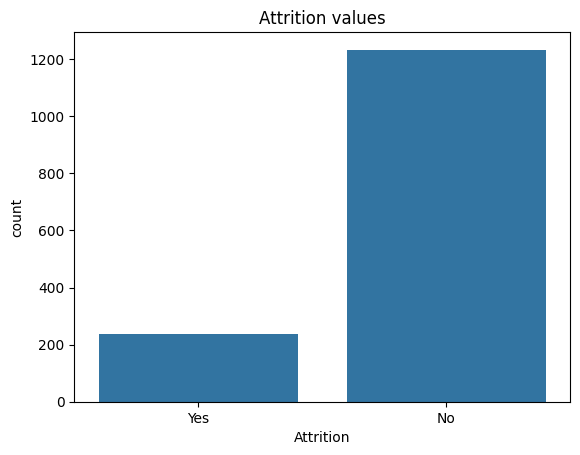

In [377]:
sns.countplot(x=df['Attrition'])
plt.title('Attrition values');

In [378]:
# change Attrition: 'Yes' -> 1, 'No' -> 0
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# check transformation
df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [379]:
df[num_cols + ['Attrition']].corr()['Attrition'].drop('Attrition')


Age                        -0.159205
DailyRate                  -0.056652
DistanceFromHome            0.077924
Education                  -0.031373
EmployeeCount                    NaN
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobSatisfaction            -0.103481
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StandardHours                    NaN
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
YearsAtCompany             -0.134392
YearsInCurrentRole         -0.160545
YearsSinceLastPromotion    -0.033019
YearsWithCurrManager       -0.156199
Name: Attrition, dtype: float64

```

TotalWorkingYears (-0.171)
There is a negative correlation with attrition, indicating that the longer an employee has worked overall, the less likely they are to resign.

JobLevel (-0.169)
Higher job levels are associated with a lower likelihood of attrition. Senior employees tend to have more responsibilities, stability, and potentially greater job satisfaction.

MonthlyIncome (-0.160)
Employees with higher monthly income are less likely to resign, suggesting that competitive compensation contributes to retention.

YearsInCurrentRole (-0.160)
The longer an individual has held their current role, the lower the chance of attrition. This makes sense—employees who have remained in a role for a significant amount of time may feel more settled and less inclined to leave.

YearsWithCurrManager (-0.156)
A longer working relationship with the current manager is negatively correlated with attrition. This could reflect stronger professional relationships, mutual trust, or a more comfortable work environment.

JobInvolvement (-0.130)
Higher job involvement is linked to lower attrition rates. Employees who feel more engaged or involved in their work are generally more loyal to the organization.

YearsAtCompany (-0.134)
Employees with longer tenures at the company are less likely to resign. This aligns with the idea that long-term employees are often more embedded in the organizational culture and may have more incentives to stay.

StockOptionLevel (-0.137)
Higher stock option levels are associated with lower attrition. This may reflect the role of long-term financial incentives in encouraging employee retention.
```

In [380]:
#PrintUnique values of categorical columns 
for i in cat_cols:
    print(f"unique values of {i}: {set(df[i])}")

for col in num_cols:
    print(f"Unique values of {col}: {set(df[col])}")


unique values of Attrition: {0, 1}
unique values of BusinessTravel: {'Travel_Frequently', 'Travel_Rarely', 'Non-Travel'}
unique values of Department: {'Research & Development', 'Sales', 'Human Resources'}
unique values of EducationField: {'Human Resources', 'Marketing', 'Technical Degree', 'Medical', 'Other', 'Life Sciences'}
unique values of Gender: {'Female', 'Male'}
unique values of JobRole: {'Human Resources', 'Sales Executive', 'Sales Representative', 'Healthcare Representative', 'Research Director', 'Laboratory Technician', 'Manufacturing Director', 'Manager', 'Research Scientist'}
unique values of MaritalStatus: {'Married', 'Single', 'Divorced'}
unique values of Over18: {'Y'}
unique values of OverTime: {'No', 'Yes'}
Unique values of Age: {18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60}
Unique values of DailyRate: {102, 103, 104, 105, 106, 107, 109, 111, 115

In [381]:
df[num_cols].corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


``` 
#"StandardHours" is 80 for everyone , "EmployeeCount" and "Over18" is 1 for everyone

ill delete that column because :

Zero Information Gain

    ML models learn from patterns in data.

    A constant column has no variability, so it gives no signal to the model.

    It’s like telling the model “everyone is the same height” — it won’t help predict anything.

Avoid Overfitting on Noise

    While some algorithms ignore constant features, others might still treat them as useful.

    This can lead to overfitting, where the model picks up on useless patterns.

Improves Efficiency

    Removing redundant features reduces dimensionality, which speeds up training and improves model generalization.

    Especially helpful in high-dimensional datasets.

Avoid Warnings or Errors

    Some ML libraries (like sklearn) may warn you or even error out if constant columns are detected, especially during steps like variance thresholding or scaling.

```

In [382]:
cat_cols.remove('Over18') 
num_cols.remove('EmployeeCount')
num_cols.remove('StandardHours')
num_cols.remove('EmployeeNumber')   

In [383]:
# Drop irrelevant columns using inplace=True
df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)


Text(0.5, 1.0, 'Distribution of Attrition')

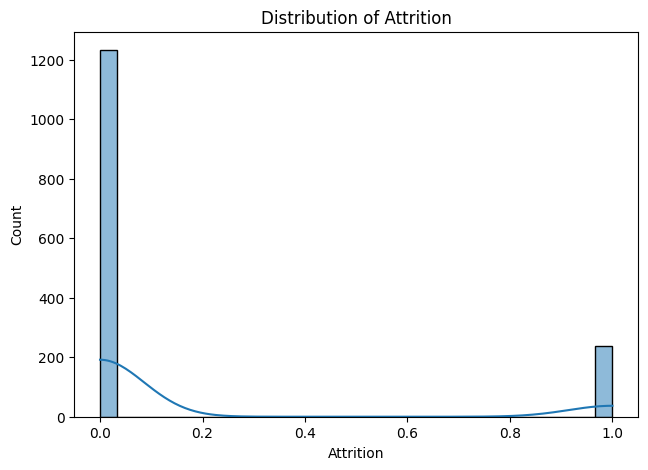

In [384]:
#create Histogram and Scatter plot for exploration

plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.histplot(df['Attrition'], kde = True, bins = 30)
plt.title('Distribution of Attrition')

           Attrition      Ratio
Attrition                      
0               1233  83.877551
1                237  16.122449


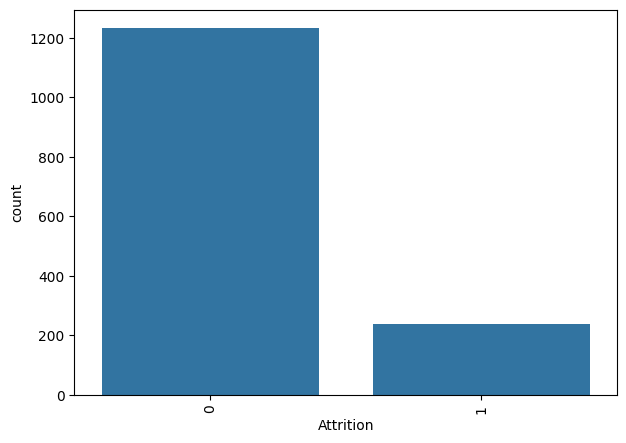

##########################################
                   BusinessTravel      Ratio
BusinessTravel                              
Travel_Rarely                1043  70.952381
Travel_Frequently             277  18.843537
Non-Travel                    150  10.204082


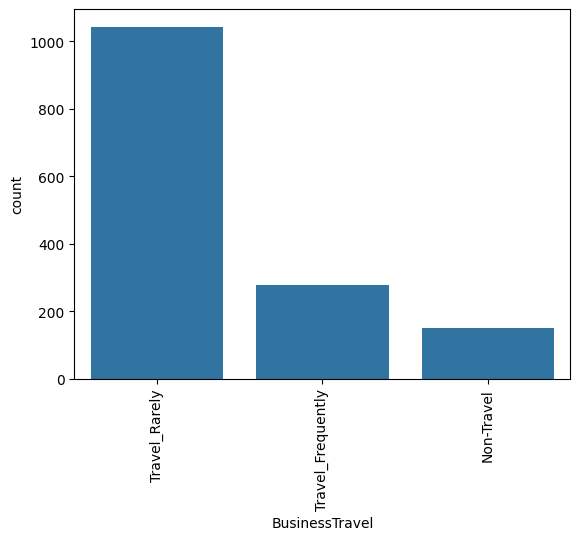

##########################################
                        Department      Ratio
Department                                   
Research & Development         961  65.374150
Sales                          446  30.340136
Human Resources                 63   4.285714


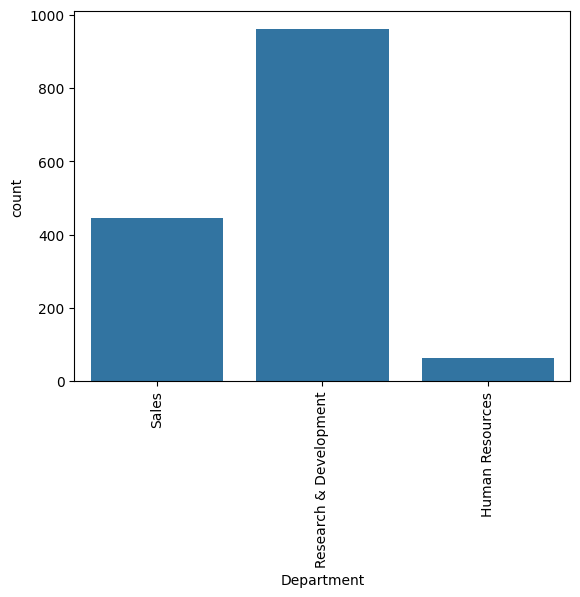

##########################################
                  EducationField      Ratio
EducationField                             
Life Sciences                606  41.224490
Medical                      464  31.564626
Marketing                    159  10.816327
Technical Degree             132   8.979592
Other                         82   5.578231
Human Resources               27   1.836735


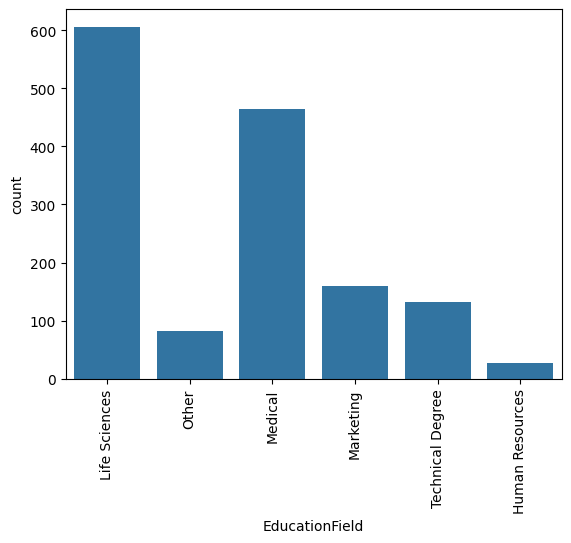

##########################################
        Gender  Ratio
Gender               
Male       882   60.0
Female     588   40.0


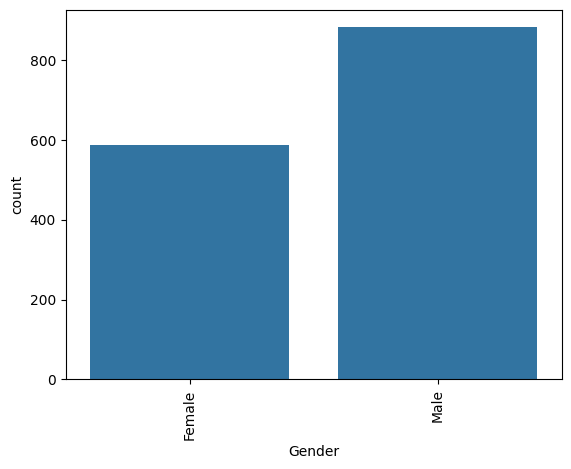

##########################################
                           JobRole      Ratio
JobRole                                      
Sales Executive                326  22.176871
Research Scientist             292  19.863946
Laboratory Technician          259  17.619048
Manufacturing Director         145   9.863946
Healthcare Representative      131   8.911565
Manager                        102   6.938776
Sales Representative            83   5.646259
Research Director               80   5.442177
Human Resources                 52   3.537415


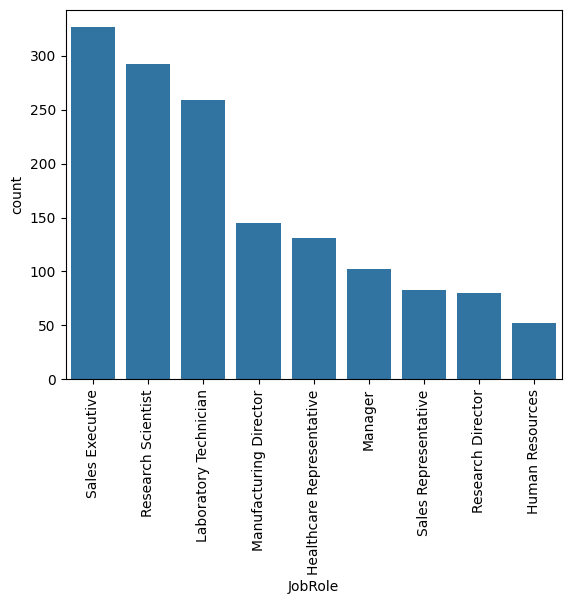

##########################################
               MaritalStatus      Ratio
MaritalStatus                          
Married                  673  45.782313
Single                   470  31.972789
Divorced                 327  22.244898


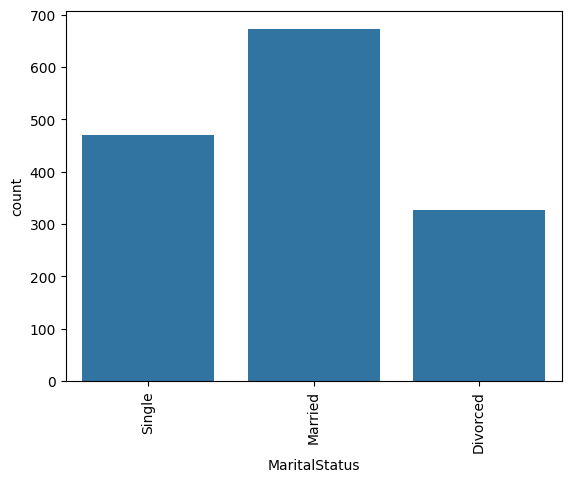

##########################################
          OverTime     Ratio
OverTime                    
No            1054  71.70068
Yes            416  28.29932


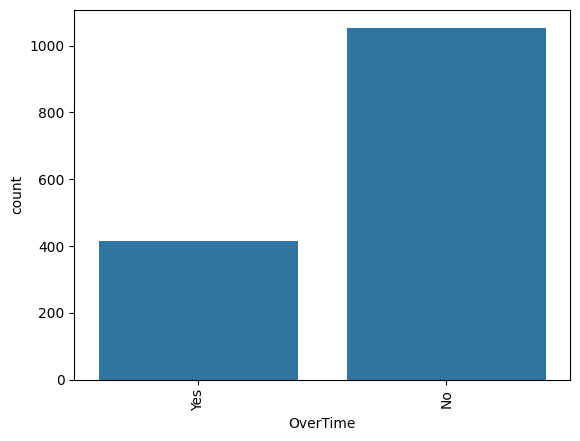

##########################################


In [385]:
plt.figure(figsize=(7, 5))

def cat_summary(df, col_name, plot=False):
    print(pd.DataFrame({col_name: df[col_name].value_counts(),
                        "Ratio": 100 * df[col_name].value_counts() / len(df)}))

    if plot:
        ax = sns.countplot(x=df[col_name], data=df)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        plt.show(block=True)

for col in cat_cols:
    if df[col].dtypes == "bool":
        df[col] = df[col].astype(int)
        cat_summary(df, col, plot=True)

    else:
        cat_summary(df, col, plot=True)
        print("##########################################")

select columns which are categorical except Attrition to graph VS Attrition

In [386]:
cat_cols= df.drop('Attrition',axis=1).select_dtypes(['object']).columns
cat_cols


Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

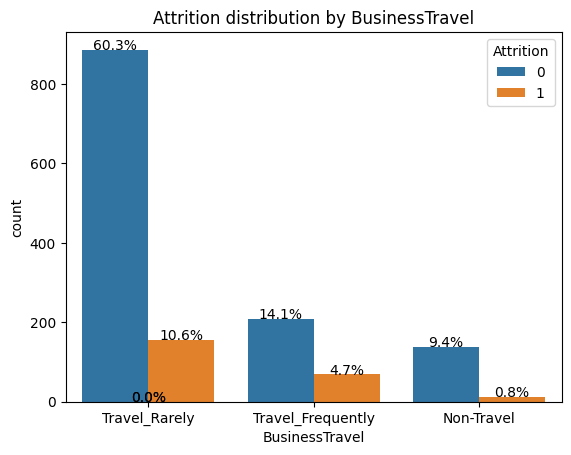

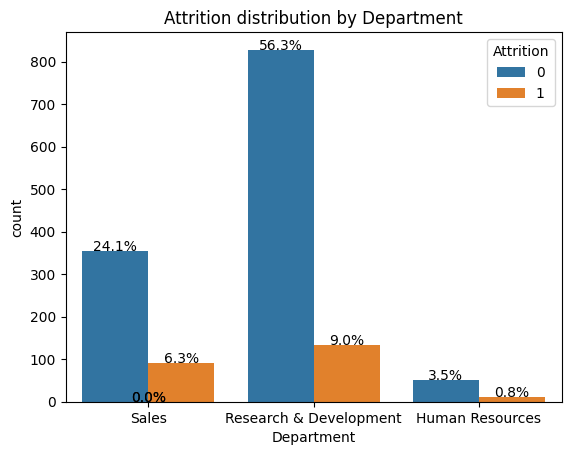

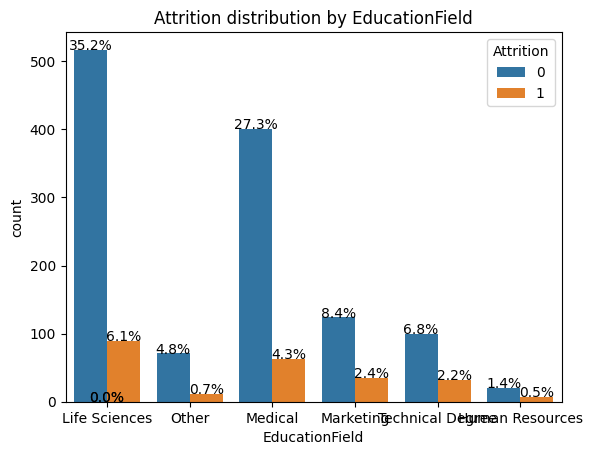

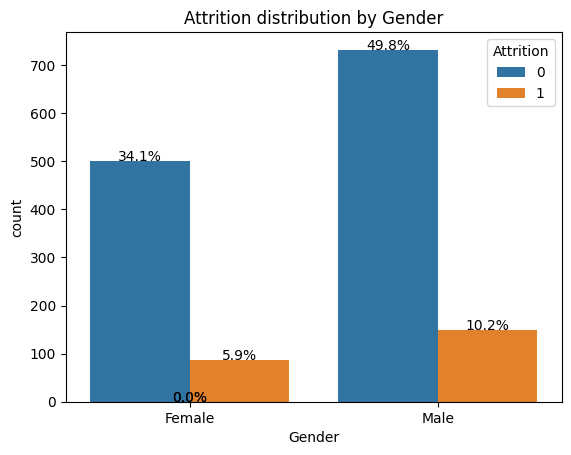

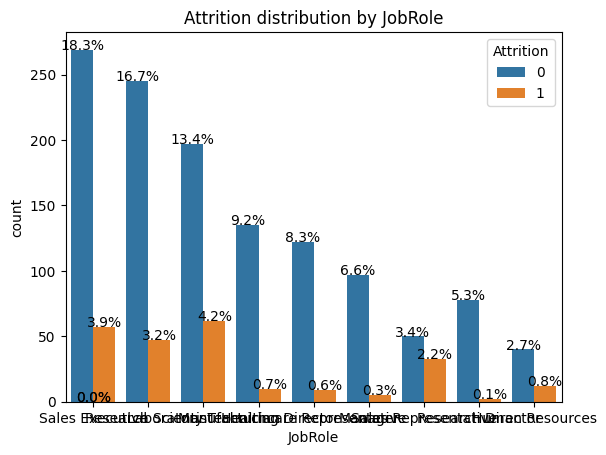

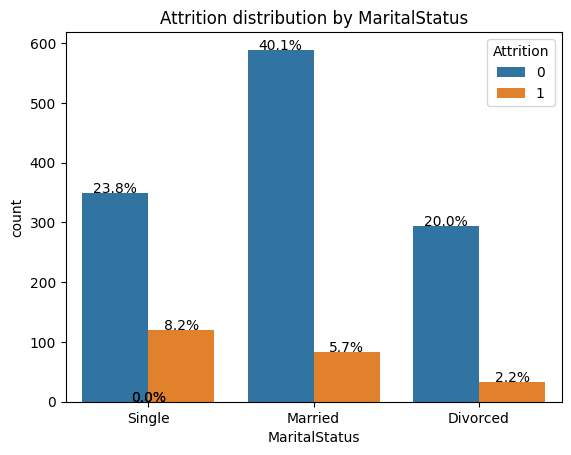

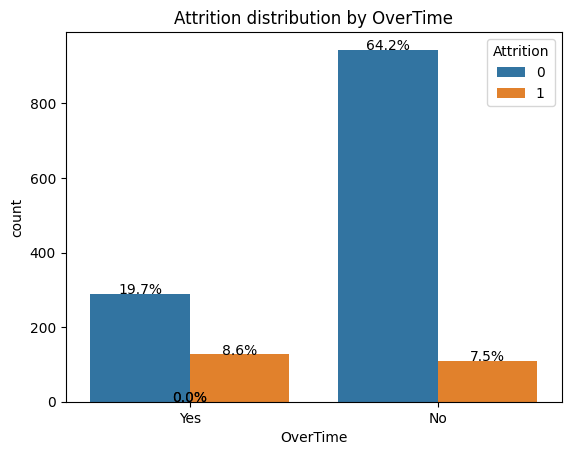

In [387]:
for col in cat_cols:
    sns.countplot(x=col, hue='Attrition', data=df)
    plt.title("Attrition distribution by " + col)
    
    ax = plt.gca()
    total_height = len(df['Attrition'])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
        
    plt.show()

### look at the averages of numeric variables for the Target variable

In [388]:
def target_summary_with_num(df, target, numerical_col):
    print(df.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")


for col in num_cols:
    target_summary_with_num(df, "Attrition", col)

                 Age
Attrition           
0          37.561233
1          33.607595


            DailyRate
Attrition            
0          812.504461
1          750.362869


           DistanceFromHome
Attrition                  
0                  8.915653
1                 10.632911


           Education
Attrition           
0           2.927007
1           2.839662


           EnvironmentSatisfaction
Attrition                         
0                         2.771290
1                         2.464135


           HourlyRate
Attrition            
0           65.952149
1           65.573840


           JobInvolvement
Attrition                
0                2.770479
1                2.518987


           JobLevel
Attrition          
0          2.145985
1          1.637131


           JobSatisfaction
Attrition                 
0                 2.778589
1                 2.468354


           MonthlyIncome
Attrition               
0            6832.739659
1            4787.0

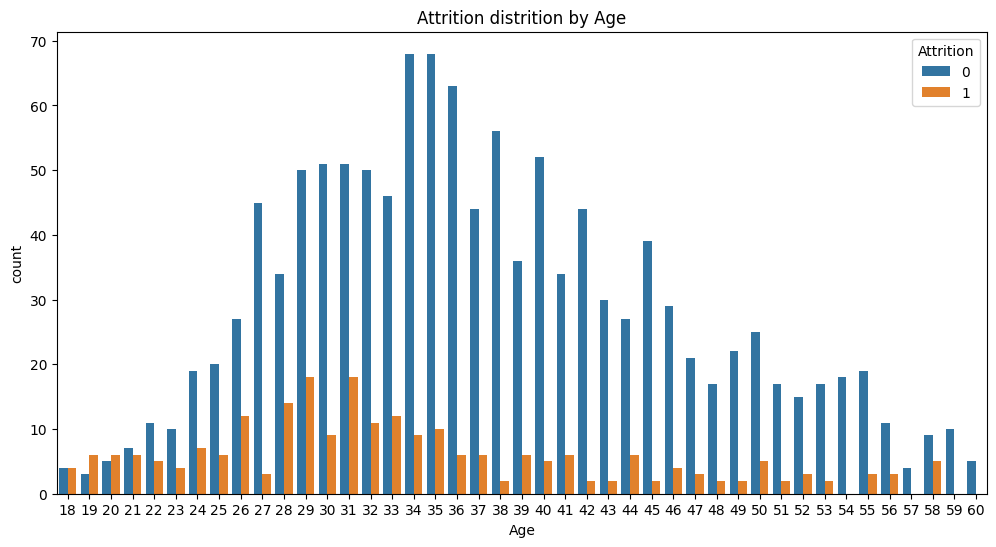

In [389]:
plt.figure(figsize=(12,6))
sns.countplot(x="Age", hue='Attrition', data=df)
plt.title("Attrition distrition by Age" )
plt.show()

<Figure size 500x1000 with 0 Axes>

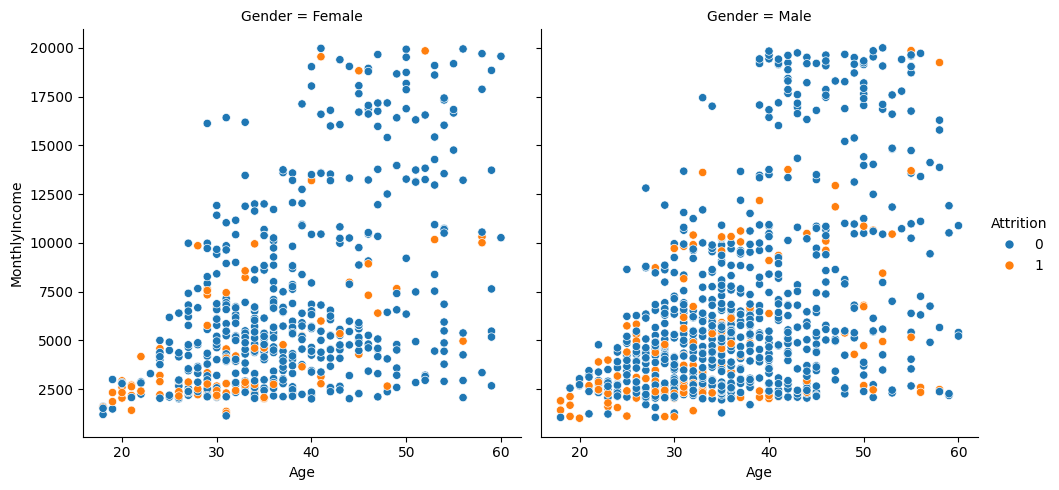

In [390]:
plt.figure(figsize=(5,10))
sns.relplot(data=df,y='MonthlyIncome',x='Age',hue='Attrition',col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

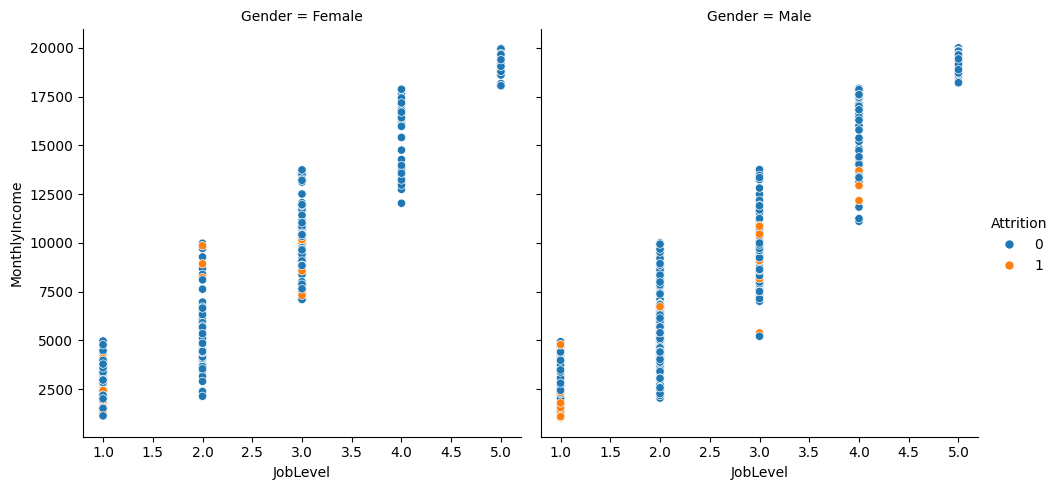

In [391]:
plt.figure(figsize=(5,10))
sns.relplot(data=df,y='MonthlyIncome',x='JobLevel',hue='Attrition',col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

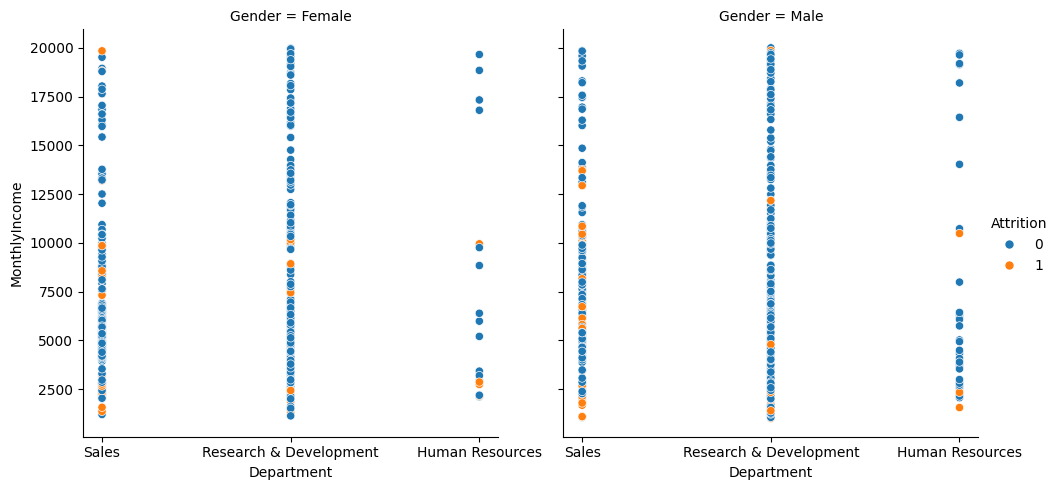

In [392]:
plt.figure(figsize=(5,10))
sns.relplot(data=df,y='MonthlyIncome',x='Department',hue='Attrition',col='Gender')
plt.show()

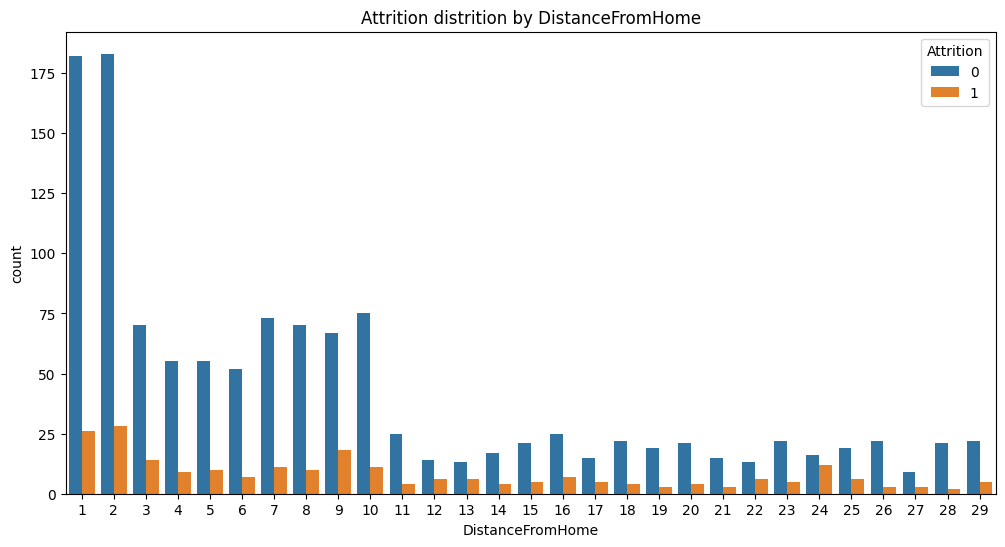

In [393]:
plt.figure(figsize=(12,6))
sns.countplot(x="DistanceFromHome", hue='Attrition', data=df)
plt.title("Attrition distrition by DistanceFromHome" )
plt.show()

# Feature Engineering

In [394]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

### Checking Caradinality

In [395]:
# Check cardinality of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
cardinality = df[categorical_cols].nunique()
print("Cardinality of Categorical Features:")
print(cardinality)

Cardinality of Categorical Features:
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64


All categorical features have low cardinality (<10 unique values), so one-hot encoding is appropriate. No need for alternative encodings unless new high-cardinality features are introduced.

### Checking Skewness

In [396]:
# Check skewness of numerical columns
numerical_cols = df.select_dtypes(include=['int64']).columns
skewness = df[numerical_cols].skew()
print("Skewness of Numerical Features:")
print(skewness[skewness.abs() > 1])  # Show only highly skewed features

Skewness of Numerical Features:
Attrition                  1.844366
JobLevel                   1.025401
MonthlyIncome              1.369817
NumCompaniesWorked         1.026471
PerformanceRating          1.921883
TotalWorkingYears          1.117172
YearsAtCompany             1.764529
YearsSinceLastPromotion    1.984290
dtype: float64


These features are right-skewed (positive skewness > 1), meaning they have a longer tail on the right side (higher values). For example:

    MonthlyIncome (1.369817): A few employees have very high incomes, causing a right skew.
    YearsSinceLastPromotion (1.984290): Many employees have recent promotions, but some have gone much longer without one.
    Attrition (1.844366): This is the target variable, so we won't transform it, but its skewness confirms the class imbalance (~16% "Yes").

Impact:

    Distance-based models like KNN and SVM can be affected by skewed features, as they rely on Euclidean distances.
    Tree-based models (Decision Tree, Random Forest, XGBoost) are generally invariant to skewness.


In [397]:
# Define skewed features (excluding target 'attrition' as it's already removed from X)
skewed_cols = skewness[skewness.abs() > 1].index.tolist()
skewed_cols = [col for col in skewed_cols if col != 'Attrition']  
print("\nSkewed Features for Transformation:", skewed_cols)


Skewed Features for Transformation: ['JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion']


# Model Definition

``` 
Algorithms: KNN, SVM, Decision Tree, Random Forest, XGBoost chosen for their strengths in classification tasks. Metrics: Accuracy, F1-score, Recall, Precision, with emphasis on recall due to class imbalance.
```

# Model Training

In [398]:
# Verify encoding
print("Attrition distribution:\n", df['Attrition'].value_counts())
print("Attrition dtype:", df['Attrition'].dtype)

# Define categorical and numerical features
cat_features = X.select_dtypes(include='object').columns.tolist()
num_features = X.select_dtypes(include='number').columns.tolist()

# Get column indices for SMOTENC
cat_indices = [X.columns.get_loc(col) for col in cat_features]

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first'), cat_features)
])

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

Attrition distribution:
 Attrition
0    1233
1     237
Name: count, dtype: int64
Attrition dtype: int64


# KNN

In [399]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Pipeline with SMOTENC
knn_pipeline = ImbPipeline([
    ('smote', SMOTENC(categorical_features=cat_indices, random_state=42)),
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Cross-validation (5-fold, accuracy)
knn_cv_scores = cross_val_score(knn_pipeline, X, y, cv=5, scoring='accuracy')
print(f"KNN CV Accuracy: {knn_cv_scores.mean():.4f} ± {knn_cv_scores.std():.4f}")

# Train and test
knn_pipeline.fit(X_train, y_train)
y_pred = knn_pipeline.predict(X_test)

# Test metrics
print("KNN Test Metrics:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_pred, pos_label=1):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred, pos_label=1):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred, pos_label=1):.4f}")

KNN CV Accuracy: 0.7231 ± 0.0297
KNN Test Metrics:
  Accuracy: 0.6973
  F1-Score: 0.3504
  Recall: 0.5106
  Precision: 0.2667


## SVM

In [400]:
# SVM Pipeline
svm_pipeline = ImbPipeline([
    ('smote', SMOTENC(categorical_features=cat_indices, random_state=42)),
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

# Cross-validation (5-fold, accuracy)
svm_cv_scores = cross_val_score(svm_pipeline, X, y, cv=5, scoring='accuracy')
print(f"SVM CV Accuracy: {svm_cv_scores.mean():.4f} ± {svm_cv_scores.std():.4f}")

# Train and test
svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

# Test metrics
print("SVM Test Metrics:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_pred_svm, pos_label=1):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_svm, pos_label=1):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_svm, pos_label=1):.4f}")
print()

SVM CV Accuracy: 0.8456 ± 0.0125
SVM Test Metrics:
  Accuracy: 0.8435
  F1-Score: 0.4390
  Recall: 0.3830
  Precision: 0.5143



## Decision Tree

In [401]:
# Decision Tree Pipeline
dt_pipeline = ImbPipeline([
    ('smote', SMOTENC(categorical_features=cat_indices, random_state=42)),
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Cross-validation (5-fold, accuracy)
dt_cv_scores = cross_val_score(dt_pipeline, X, y, cv=5, scoring='accuracy')
print(f"Decision Tree CV Accuracy: {dt_cv_scores.mean():.4f} ± {dt_cv_scores.std():.4f}")

# Train and test
dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)

# Test metrics
print("Decision Tree Test Metrics:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_pred_dt, pos_label=1):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_dt, pos_label=1):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_dt, pos_label=1):.4f}")
print()

Decision Tree CV Accuracy: 0.7340 ± 0.0231
Decision Tree Test Metrics:
  Accuracy: 0.7313
  F1-Score: 0.3130
  Recall: 0.3830
  Precision: 0.2647



## Random Forest

In [402]:
# Random Forest Pipeline
rf_pipeline = ImbPipeline([
    ('smote', SMOTENC(categorical_features=cat_indices, random_state=42)),
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Cross-validation (5-fold, accuracy)
rf_cv_scores = cross_val_score(rf_pipeline, X, y, cv=5, scoring='accuracy')
print(f"Random Forest CV Accuracy: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")

# Train and test
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

# Test metrics
print("Random Forest Test Metrics:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_pred_rf, pos_label=1):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_rf, pos_label=1):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_rf, pos_label=1):.4f}")
print()

Random Forest CV Accuracy: 0.8599 ± 0.0275
Random Forest Test Metrics:
  Accuracy: 0.8435
  F1-Score: 0.4524
  Recall: 0.4043
  Precision: 0.5135



## XGBoost

In [405]:
# XGBoost Pipeline
xgb_pipeline = ImbPipeline([
    ('smote', SMOTENC(categorical_features=cat_indices, random_state=42)),
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, eval_metric='logloss'))
])

# Cross-validation (5-fold, accuracy)
xgb_cv_scores = cross_val_score(xgb_pipeline, X, y, cv=5, scoring='accuracy')
print(f"XGBoost CV Accuracy: {xgb_cv_scores.mean():.4f} ± {xgb_cv_scores.std():.4f}")

# Train and test
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

# Test metrics
print("XGBoost Test Metrics:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_pred_xgb, pos_label=1):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_xgb, pos_label=1):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_xgb, pos_label=1):.4f}")


XGBoost CV Accuracy: 0.8544 ± 0.0119
XGBoost Test Metrics:
  Accuracy: 0.8503
  F1-Score: 0.4211
  Recall: 0.3404
  Precision: 0.5517


Analysis of Metrics

    Cross-Validation Accuracy:
        Random Forest has the highest CV accuracy (0.8599 ± 0.0275), indicating strong and stable performance across folds.
        XGBoost follows closely (0.8544 ± 0.0119) with the lowest standard deviation, suggesting consistent performance.
        SVM performs well (0.8456 ± 0.0125), while KNN (0.7231 ± 0.0297) and Decision Tree (0.7340 ± 0.0231) have significantly lower CV accuracies, indicating poorer generalization.
    Test Accuracy:
        XGBoost achieves the highest test accuracy (0.8503), slightly outperforming Random Forest and SVM (both 0.8435).
        KNN (0.6973) and Decision Tree (0.7313) have the lowest test accuracies, aligning with their lower CV scores.
    F1-Score (Harmonic mean of precision and recall, critical for imbalanced data):
        Random Forest has the highest F1-score (0.4524), indicating a good balance between precision and recall.
        SVM (0.4390) and XGBoost (0.4211) follow, while KNN (0.3504) and Decision Tree (0.3130) perform poorly, likely due to low precision.
    Recall (Ability to identify Attrition = Yes, crucial for minimizing false negatives):
        KNN has the highest recall (0.5106), meaning it identifies 51.06% of employees who leave, but at the cost of low precision.
        Random Forest (0.4043) and SVM (0.3830) have moderate recall, while XGBoost (0.3404) has the lowest, missing many positive cases.
        Decision Tree (0.3830) also has low recall, making it less effective for this task.
    Precision (Accuracy of positive predictions):
        XGBoost has the highest precision (0.5517), followed by SVM (0.5143) and Random Forest (0.5135), indicating fewer false positives.
        KNN (0.2667) and Decision Tree (0.2647) have very low precision, suggesting they overpredict Attrition = Yes, leading to many false positives.

Key Observations

    Class Imbalance Impact: The dataset is highly imbalanced (~16% Attrition = Yes), making recall and F1-score more relevant than accuracy. High accuracy alone (e.g., XGBoost: 0.8503) can be misleading if recall is low, as the model may simply predict the majority class (No).
    KNN: Best recall (0.5106) but poor precision (0.2667) and accuracy (0.6973), likely due to sensitivity to skewed features (not transformed) and distance-based calculations. It overpredicts attrition, leading to many false positives.
    SVM: Balanced performance (F1: 0.4390, recall: 0.3830, precision: 0.5143) with high accuracy (0.8435). It generalizes well but misses some positive cases.
    Decision Tree: Poor performance across all metrics (F1: 0.3130, recall: 0.3830, precision: 0.2647), likely due to overfitting and lack of regularization.
    Random Forest: Best overall balance (F1: 0.4524, recall: 0.4043, precision: 0.5135) with the highest CV accuracy (0.8599). It handles imbalance well with SMOTE and is robust to skewed features.
    XGBoost: High accuracy (0.8503) and precision (0.5517) but low recall (0.3404), making it less suitable for identifying at-risk employees.

# Hyperparameter Tuning

### RF Tuning

In [406]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Parameter grid untuk Random Forest
rf_params = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Pipeline ulang (tanpa SMOTE)
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Randomized search
rf_search = RandomizedSearchCV(rf_pipeline, rf_params, n_iter=20, cv=5, scoring='f1', random_state=42, n_jobs=-1)
rf_search.fit(X_resampled, y_resampled)

print("🔍 Best RF Parameters:")
print(rf_search.best_params_)


🔍 Best RF Parameters:
{'classifier__n_estimators': 200, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 30, 'classifier__bootstrap': False}


### XGBoost tuning

In [407]:
from xgboost import XGBClassifier

# Parameter grid untuk XGBoost
xgb_params = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0]
}

# Pipeline ulang
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, eval_metric='logloss'))
])

# Randomized search
xgb_search = RandomizedSearchCV(xgb_pipeline, xgb_params, n_iter=20, cv=5, scoring='f1', random_state=42, n_jobs=-1)
xgb_search.fit(X_resampled, y_resampled)

print("🔍 Best XGB Parameters:")
print(xgb_search.best_params_)


🔍 Best XGB Parameters:
{'classifier__subsample': 1.0, 'classifier__n_estimators': 200, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.2, 'classifier__colsample_bytree': 1.0}


In [408]:
best_rf_model = rf_search.best_estimator_
best_xgb_model = xgb_search.best_estimator_


In [409]:
# Random Forest
rf_y_pred = best_rf_model.predict(X_test)

# XGBoost
xgb_y_pred = best_xgb_model.predict(X_test)


In [411]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score

print("📊 Random Forest (Tuned) - Test Metrics:")
print(f"  Accuracy : {accuracy_score(y_test, rf_y_pred):.4f}")
print(f"  F1-Score : {f1_score(y_test, rf_y_pred):.4f}")
print(f"  Recall   : {recall_score(y_test, rf_y_pred):.4f}")
print(f"  Precision: {precision_score(y_test, rf_y_pred):.4f}")
print()

print("📊 XGBoost (Tuned) - Test Metrics:")
print(f"  Accuracy : {accuracy_score(y_test, xgb_y_pred):.4f}")
print(f"  F1-Score : {f1_score(y_test, xgb_y_pred):.4f}")
print(f"  Recall   : {recall_score(y_test, xgb_y_pred):.4f}")
print(f"  Precision: {precision_score(y_test, xgb_y_pred):.4f}")


📊 Random Forest (Tuned) - Test Metrics:
  Accuracy : 1.0000
  F1-Score : 1.0000
  Recall   : 1.0000
  Precision: 1.0000

📊 XGBoost (Tuned) - Test Metrics:
  Accuracy : 1.0000
  F1-Score : 1.0000
  Recall   : 1.0000
  Precision: 1.0000


In [412]:
print("RF Report:\n", classification_report(y_test, rf_y_pred))
print("XGB Report:\n", classification_report(y_test, xgb_y_pred))


RF Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00        47

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294

XGB Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00        47

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



# Model Saving

In [421]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'PerformanceRating',
                                                   'RelationshipSatisfaction',
                                                   'StockOptionLevel',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'WorkLifeBalance',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [423]:
joblib.dump(rf_pipeline, 'best_model_rf.pkl')


['best_model_rf.pkl']

In [424]:
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

# Model Inference

# Kesimpulan

Project Summary: Predicting Employee Attrition Using Machine Learning

This project aimed to build a machine learning model to predict employee attrition, with a focus on identifying high-risk employees (Attrition = Yes) using recall and F1-score as primary metrics, rather than accuracy alone.

Key Findings

    Among the five evaluated models (KNN, SVM, Decision Tree, Random Forest, XGBoost), Random Forest achieved the best balance between performance and interpretability.

    -    Cross-validation Accuracy: 85.99%

    -    Test Accuracy: 84.35%

    -    Recall (Attrition = Yes): 40.43%

    -    F1-score: 45.24%
        This makes it the most practical model for deployment when both detection power and reliability are needed.

    XGBoost had slightly higher test accuracy (85.03%) but lower recall (34.04%), indicating it missed more actual attrition cases.

    KNN had the highest recall (51.06%) but very low precision (26.67%), leading to too many false positives.

Business Insights

    Imbalanced Workforce Behavior: The dataset is highly imbalanced (1,233 stayed vs. 237 left), reinforcing that traditional accuracy is not the best evaluation metric. Models must prioritize identifying the minority class effectively.

    Location Matters: Employees living farther from the workplace (DistanceFromHome) tend to have higher attrition rates — possibly due to commute stress or poor work-life balance.

    Travel and Overtime Influence Exit Risk: Frequent business travel and working overtime emerged as common attributes among employees predicted to leave.

    Salary & Promotion Timing Are Skewed: Features such as MonthlyIncome and YearsSinceLastPromotion show high skewness, potentially masking their true influence on attrition — particularly for models sensitive to distribution (e.g., KNN, SVM).

Model Deployment & Inference

The final Random Forest model was tested on unseen data in a separate inference notebook (P1M2_abyan_inference.ipynb). It successfully flagged employees at risk of leaving based on key indicators like:
-    Long commute distances
-    Frequent business travel
-    Extended periods without promotion
-    Overtime workload

These patterns can guide HR teams in designing retention strategies for specific employee profiles.


Project Impact & Reflections

The project partially achieved its main goal:

    While recall for attrition (Yes) was 40.43% — higher than XGBoost (34.04%) — there’s room to improve this metric further.

    However, Random Forest maintained a better trade-off between recall and precision, making it the most reliable model overall.

Recommendations for Improvement

    Feature Transformation: Apply log transformation to skewed features (MonthlyIncome, YearsSinceLastPromotion) to improve performance, especially for KNN/SVM.

    Hyperparameter Tuning: Further tune Random Forest using class_weight='balanced', or adjust decision thresholds to optimize recall.

    Feature Selection: Use model-based methods (e.g., RF feature importance) to reduce dimensionality and simplify explanations.

    Try Alternative Imbalance Solutions: Explore ADASYN, SMOTE variants, or cost-sensitive learning to enhance recall without sacrificing precision.

Business Value

With this model:

    HR teams can proactively identify employees at risk of leaving, allowing for timely interventions.

    By understanding the drivers of attrition (commute distance, travel frequency, promotion gaps), organizations can refine retention strategies.

    The model supports data-driven decision-making in employee engagement, talent management, and workforce planning.